In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [359]:
df=pd.read_csv("mouse_viral_study.csv")

In [360]:
df.corr()

,Med_1_mL,Med_2_mL,Virus Present
Med_1_mL,1.000000,0.828090,-0.922304
Med_2_mL,0.828090,1.000000,-0.903718
Virus Present,-0.922304,-0.903718,1.000000


In [361]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


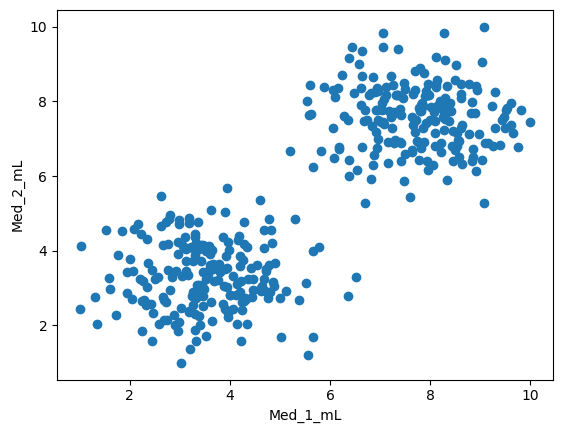

In [362]:
plt.plot(df["Med_2_mL"],df["Med_1_mL"],'o')
plt.xlabel('Med_1_mL')
plt.ylabel('Med_2_mL')
plt.show()

In [363]:
X=df['Med_1_mL']
y=df['Med_2_mL']

In [364]:
X = X.values.reshape(-1, 1)  
y = y.values.reshape(-1, 1) 
print(X.shape)

(400, 1)


In [365]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train=np.array(X_train).reshape(-1, 1)
X_train.shape

(320, 1)

In [366]:
# Define maximum polynomial degree
max_degree = 20

# Initialize lists to store BIC values and models
bic_values = []
models = []

# Loop over polynomial degrees
for degree in range(1, max_degree+1):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    
    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Compute number of parameters
    num_params = X_train_poly.shape[1]
    
    # Compute log-likelihood
    y_train_pred = model.predict(X_train_poly)
    log_likelihood = -0.5 * len(X_train) * np.log(mean_squared_error(y_train, y_train_pred))
    
    # Compute BIC
    bic = -2 * log_likelihood + num_params * np.log(len(X_train))
    
    # Append BIC value and model
    bic_values.append(bic)
    models.append(model)

# Find index of model with lowest BIC
best_model_idx = np.argmin(bic_values)
best_model = models[best_model_idx]
best_degree = best_model_idx + 1

print(f"Best polynomial degree: {best_degree}")



Best polynomial degree: 9


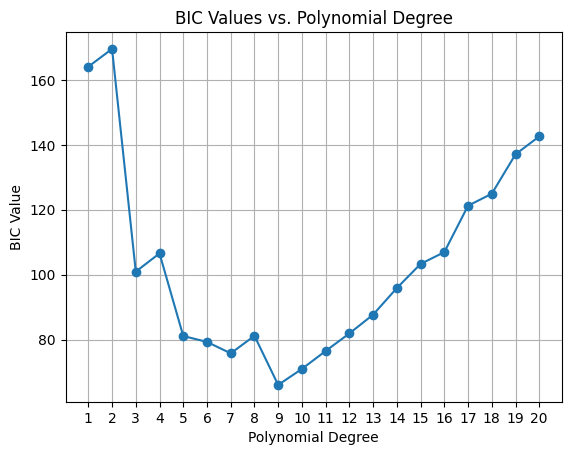

In [367]:
# Plot BIC values vs. polynomial degree
plt.plot(range(1, max_degree+1), bic_values, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('BIC Value')
plt.title('BIC Values vs. Polynomial Degree')
plt.xticks(range(1, max_degree+1))
plt.grid(True)
plt.show()

In [368]:
def puiss(X,n):
    for k in range(0,n-1):
        


        product_column = np.multiply(X[:, 0], X[:, k])


        X = np.column_stack((product_column, X))
    print(X.shape)
    print(X[0])
    return X

In [369]:
X_train = puiss(X_train,17)
X_test = puiss(X_test,17)

(320, 17)
[4.02960086e+09 1.09710102e+09 2.98697236e+08 8.13234492e+07
 2.21411603e+07 6.02816267e+06 1.64123039e+06 4.46842153e+05
 1.21657454e+05 3.31225152e+04 9.01795150e+03 2.45523169e+03
 6.68462529e+02 1.81995921e+02 4.95502946e+01 1.34905864e+01
 3.67295336e+00]
(80, 17)
[5.96611557e+14 8.06368081e+13 1.08987075e+13 1.47304720e+12
 1.99094072e+11 2.69091510e+10 3.63698629e+09 4.91567691e+08
 6.64392922e+07 8.97980000e+06 1.21369156e+06 1.64040090e+05
 2.21713259e+04 2.99663144e+03 4.05018629e+02 5.47414965e+01
 7.39874966e+00]


In [370]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
means = scaler.mean_
scales = np.sqrt(scaler.var_)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = (X_test - means)/scales
print(X_train_scaled)

[[-0.22504139 -0.24623756 -0.27089091 ... -0.84343955 -0.82952049
  -0.74311154]
 [-0.13396699 -0.12742792 -0.11645581 ...  0.7924221   0.87654002
   0.91914146]
 [-0.22503812 -0.24622999 -0.2708735  ... -0.75028439 -0.68545558
  -0.54252169]
 ...
 [-0.22504189 -0.2462389  -0.27089443 ... -0.96538704 -1.05572812
  -1.1227261 ]
 [-0.22504187 -0.24623883 -0.27089423 ... -0.93214625 -0.98762541
  -0.99715199]
 [-0.22504189 -0.2462389  -0.27089445 ... -0.97248922 -1.07122969
  -1.15315461]]


In [371]:
ones_column = np.ones((X_train_scaled.shape[0], 1))
ones_column2 = np.ones((X_test_scaled.shape[0], 1))
X_train_scaled = np.hstack((X_train_scaled, ones_column))
X_test_scaled = np.hstack((X_test_scaled, ones_column2))
print(X_test_scaled)

[[-0.14965901 -0.1467988  -0.14018955 ...  0.82708403  0.88302046
   1.        ]
 [-0.22504189 -0.24623889 -0.27089443 ... -1.05400128 -1.11938316
   1.        ]
 [ 0.36981543  0.44867131  0.53798937 ...  1.43186784  1.30025058
   1.        ]
 ...
 [-0.15762668 -0.15672293 -0.1524582  ...  0.79838134  0.86187047
   1.        ]
 [-0.1302761  -0.12290155 -0.11094633 ...  0.88707026  0.92678092
   1.        ]
 [-0.22504038 -0.24623513 -0.27088511 ... -0.75525787 -0.63676946
   1.        ]]


In [372]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta=np.random.randn(18,1)
print('Theta:',theta)

Theta: [[ 1.76405235]
 [ 0.40015721]
 [ 0.97873798]
 [ 2.2408932 ]
 [ 1.86755799]
 [-0.97727788]
 [ 0.95008842]
 [-0.15135721]
 [-0.10321885]
 [ 0.4105985 ]
 [ 0.14404357]
 [ 1.45427351]
 [ 0.76103773]
 [ 0.12167502]
 [ 0.44386323]
 [ 0.33367433]
 [ 1.49407907]
 [-0.20515826]]


In [373]:
def model(X, theta):
    return X.dot(theta)
#Standard
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [374]:
cost_function(X_train_scaled, y_train, theta)

65.82004795818817

In [375]:
#Standard
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [376]:
n_iterations = 4000
learning_rate = 0.09

theta_final, cost_history = gradient_descent(X_train_scaled, y_train, theta, learning_rate, n_iterations)


In [377]:
theta_final

array([[ 1.01554009],
       [-0.18856691],
       [ 0.4630608 ],
       [ 1.70126988],
       [ 1.20422179],
       [-1.85415638],
       [-0.20121696],
       [-1.58387159],
       [-1.74116132],
       [-1.25027354],
       [-1.24528477],
       [ 0.70633476],
       [ 0.99115686],
       [ 1.4224955 ],
       [ 2.33708018],
       [ 1.3622667 ],
       [-1.11303121],
       [ 5.58344633]])

In [378]:
predictions = model(X_train_scaled, theta_final)
predictions

array([[3.59694228],
       [8.07675167],
       [3.88828999],
       [3.51858848],
       [3.30281702],
       [8.10757737],
       [3.28778343],
       [6.16775182],
       [3.3240172 ],
       [3.50706907],
       [4.07511431],
       [6.42683306],
       [7.22301631],
       [4.57278802],
       [3.40748834],
       [7.53965302],
       [8.09346566],
       [8.06790757],
       [8.14757619],
       [8.15321363],
       [7.87321512],
       [3.54302821],
       [6.44587451],
       [3.28494971],
       [8.13902659],
       [7.16467751],
       [3.42039501],
       [7.95579744],
       [3.33033768],
       [3.29902713],
       [8.0444732 ],
       [6.79247132],
       [3.4368566 ],
       [7.94561984],
       [3.28534005],
       [7.97342267],
       [3.92844153],
       [3.97115806],
       [8.17682046],
       [8.11322275],
       [3.2903171 ],
       [3.70551597],
       [7.94075275],
       [6.97650161],
       [7.29383425],
       [4.07409511],
       [7.60576748],
       [3.357

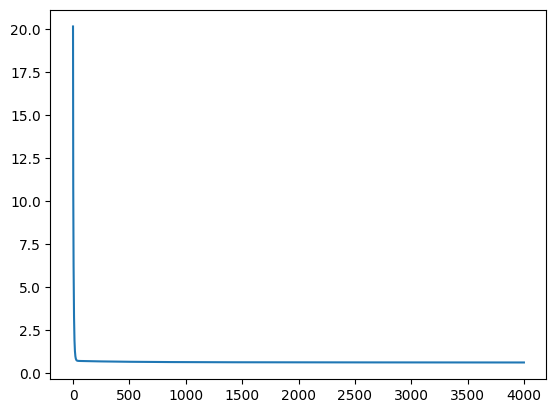

In [379]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [380]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [381]:
print(coef_determination(y_train, predictions))
predictions = model(X_test_scaled, theta_final)
print(coef_determination(y_test, predictions))


0.7827866328559206
0.7053213660631392


In [382]:
#Reguleration Lasso:
def cost_function_(X, y, theta,a):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2) + a/m * np.linalg.norm(theta, ord=1)
def grad_(X, y, theta,a):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y) + a/m * theta *np.sign(theta)
def gradient_descent_(X, y, theta, learning_rate, n_iterations,a):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad_(X, y, theta,a) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function_(X, y, theta,a) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [383]:
cost_function_(X_train_scaled, y_train, theta,0.5)

65.84317568366322

In [384]:
n_iterations = 4000
learning_rate = 0.09

theta_final, cost_history = gradient_descent_(X_train_scaled, y_train, theta, learning_rate, n_iterations,0.0001)

In [385]:
theta_final

array([[ 1.01549502],
       [-0.18848989],
       [ 0.46312539],
       [ 1.70120967],
       [ 1.20422455],
       [-1.85426659],
       [-0.20112552],
       [-1.58391503],
       [-1.74120251],
       [-1.25024517],
       [-1.24525336],
       [ 0.7063575 ],
       [ 0.99117747],
       [ 1.4225052 ],
       [ 2.33700987],
       [ 1.36227161],
       [-1.11301429],
       [ 5.58344459]])

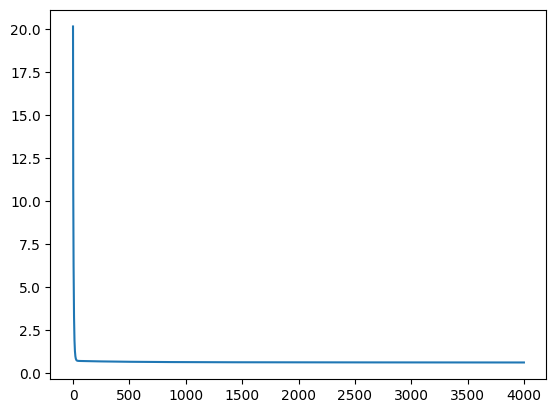

In [386]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [387]:
predictions = model(X_train_scaled, theta_final)
print(coef_determination(y_train, predictions))
predictions = model(X_test_scaled, theta_final)
print(coef_determination(y_test, predictions))

0.7827864990262968
0.7053210138452102


In [388]:
#regulation ridge :
def cost_function__(X, y, theta,a):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2) + a/(2*m) * np.sum(theta[0:len(theta)-1]**2)
def grad__(X, y, theta,a):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y) + a/m * theta
def gradient_descent__(X, y, theta, learning_rate, n_iterations,a):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad__(X, y, theta,a) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function__(X, y, theta,a) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [389]:
cost_function__(X_train_scaled, y_train, theta,0.5)

65.83572723367683

In [390]:
n_iterations = 300
learning_rate = 0.1

theta_final, cost_history = gradient_descent__(X_train_scaled, y_train, theta, learning_rate, n_iterations,0.001)

In [391]:
theta_final

array([[ 1.03748902],
       [-0.39195908],
       [ 0.12020401],
       [ 1.31836361],
       [ 0.88846772],
       [-1.99856458],
       [-0.09048222],
       [-1.17598072],
       [-1.06384146],
       [-0.42507272],
       [-0.49718898],
       [ 1.07380368],
       [ 0.68290672],
       [ 0.32495435],
       [ 0.7897916 ],
       [ 0.49514857],
       [ 0.89339834],
       [ 5.58342888]])

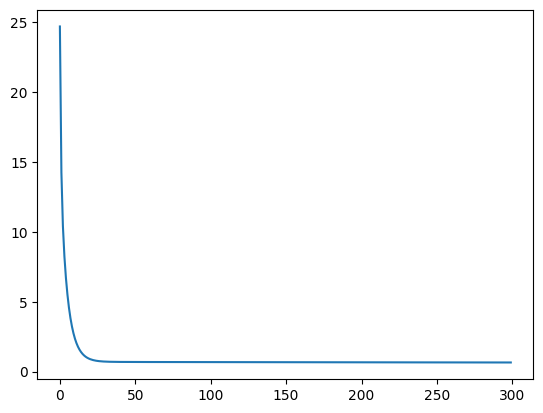

In [392]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [393]:
predictions = model(X_train_scaled, theta_final)
print(coef_determination(y_train, predictions))
predictions = model(X_test_scaled, theta_final)
print(coef_determination(y_test, predictions))

0.763258086967923
0.6815091105446311


0.76087503557247
0.6789272868121735
